<a href="https://colab.research.google.com/github/iamkishan98/Deep-learning-assignments/blob/master/PhishingWebsites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/PhishingDL/')

In [0]:
import pandas as pd
import io
df = pd.read_csv('csv_result-Phishing_features.csv')

In [49]:
df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [0]:
y = df['Result']

In [51]:
y=y.replace(-1,0)
y

0        0
1        0
2        0
3        0
4        1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: Result, Length: 11055, dtype: int64

In [0]:
X = df.iloc[:,1:31]

In [54]:
X.head()  

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train,X_test = X_train.values,X_test.values
y_train,y_test = y_train.values,y_test.values


In [73]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=40)
model.evaluate(X_test, y_test)

Epoch 1/40
232/232 [==============================] - 2s 9ms/step - loss: 0.1930 - accuracy: 0.9216
Epoch 2/40
232/232 [==============================] - 2s 9ms/step - loss: 0.1402 - accuracy: 0.9406
Epoch 3/40
232/232 [==============================] - 2s 9ms/step - loss: 0.1237 - accuracy: 0.9498
Epoch 4/40
232/232 [==============================] - 2s 9ms/step - loss: 0.1051 - accuracy: 0.9556
Epoch 5/40
232/232 [==============================] - 2s 8ms/step - loss: 0.0905 - accuracy: 0.9623
Epoch 6/40
232/232 [==============================] - 2s 9ms/step - loss: 0.0840 - accuracy: 0.9634
Epoch 7/40
232/232 [==============================] - 2s 9ms/step - loss: 0.0751 - accuracy: 0.9695
Epoch 8/40
232/232 [==============================] - 2s 8ms/step - loss: 0.0716 - accuracy: 0.9706
Epoch 9/40
232/232 [==============================] - 2s 7ms/step - loss: 0.0648 - accuracy: 0.9734
Epoch 10/40
232/232 [==============================] - 2s 8ms/step - loss: 0.0648 - accuracy: 0.9748

[0.1711203008890152, 0.966292142868042]

dict_keys(['loss', 'accuracy'])


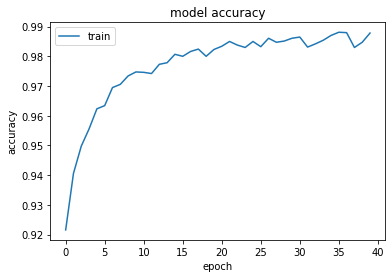

In [74]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

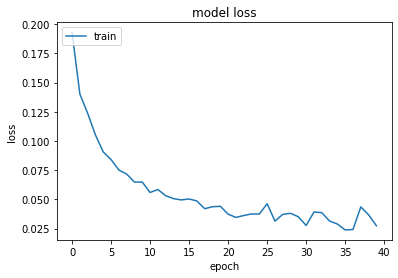

In [75]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
ypred = model.predict(X_test)

Precision : 0.9620608899297424
Recall :  0.9856046065259118
F1-Score :  0.9736904479734534
Not Phished accuracy :  94.82428115015973 %
Fished Accuracy :  98.56046065259117 %
Normalized confusion matrix
[[0.95 0.05]
 [0.01 0.99]]


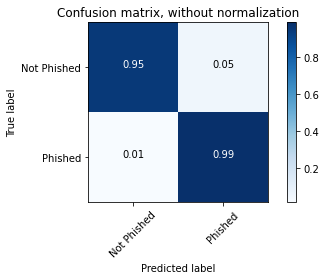

In [71]:
from sklearn.metrics import confusion_matrix
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, ypred.round())
res = cnf_matrix.diagonal()/cnf_matrix.sum(axis=1)
prec = cnf_matrix[1][1]/(cnf_matrix[1][1] + cnf_matrix[0][1])
rec = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
f1_score = (2*prec*rec)/(prec + rec)
print("Precision :",prec)#cnf_matrix[][])
print("Recall : " ,rec)
print("F1-Score : ",f1_score)
print("Not Phished accuracy : ",res[0]*100,"%")
print("Fished Accuracy : ",res[1]*100,"%")
#print("Overall Accuracy :",((res[0]+res[1])/2)*100,"%")
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Phished','Phished'],
                      title='Confusion matrix, without normalization')


In [0]:
#With RMSProp Optimizer
df = pd.read_csv('csv_result-Phishing_features.csv')

In [77]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(X_train, y_train, epochs=40)

model.evaluate(X_test, y_test)

Epoch 1/40
232/232 [==============================] - 2s 8ms/step - loss: 0.2084 - accuracy: 0.9166
Epoch 2/40
232/232 [==============================] - 2s 8ms/step - loss: 0.1480 - accuracy: 0.9422
Epoch 3/40
232/232 [==============================] - 2s 8ms/step - loss: 0.1232 - accuracy: 0.9504
Epoch 4/40
232/232 [==============================] - 2s 8ms/step - loss: 0.1161 - accuracy: 0.9530
Epoch 5/40
232/232 [==============================] - 2s 8ms/step - loss: 0.1032 - accuracy: 0.9588
Epoch 6/40
232/232 [==============================] - 2s 8ms/step - loss: 0.0942 - accuracy: 0.9608
Epoch 7/40
232/232 [==============================] - 2s 8ms/step - loss: 0.0920 - accuracy: 0.9653
Epoch 8/40
232/232 [==============================] - 2s 8ms/step - loss: 0.0861 - accuracy: 0.9653
Epoch 9/40
232/232 [==============================] - 2s 8ms/step - loss: 0.0847 - accuracy: 0.9668
Epoch 10/40
232/232 [==============================] - 2s 8ms/step - loss: 0.0821 - accuracy: 0.9679

[0.37878289818763733, 0.9651959538459778]

dict_keys(['loss', 'accuracy'])


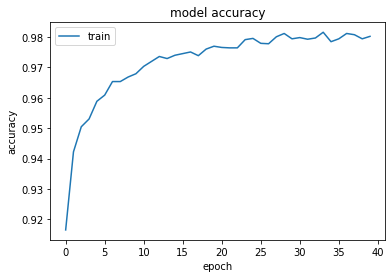

In [78]:
print(history1.history.keys())
plt.plot(history1.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

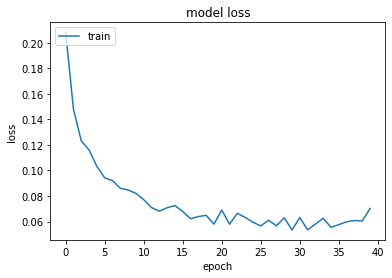

In [79]:
plt.plot(history1.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
y_pred2 = model.predict(X_test)

Precision : 0.9430555555555555
Recall :  0.977447216890595
F1-Score :  0.9599434495758719
Not Phished accuracy :  92.1405750798722 %
Fished Accuracy :  97.7447216890595 %
Overall Accuracy : 94.94264838446584 %
Normalized confusion matrix
[[0.95 0.05]
 [0.01 0.99]]


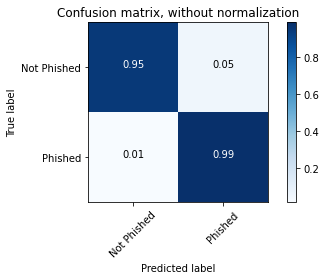

In [66]:
from sklearn.metrics import confusion_matrix
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix1 = confusion_matrix(y_test, y_pred2.round())
res1 = cnf_matrix1.diagonal()/cnf_matrix1.sum(axis=1)
prec1 = cnf_matrix1[1][1]/(cnf_matrix1[1][1] + cnf_matrix1[0][1])
rec1 = cnf_matrix1[1][1]/(cnf_matrix1[1][1]+cnf_matrix1[1][0])
f1_score1 = (2*prec1*rec1)/(prec1 + rec1)
print("Precision :",prec1)#cnf_matrix[][])
print("Recall : " ,rec1)
print("F1-Score : ",f1_score1)
print("Not Phished accuracy : ",res1[0]*100,"%")
print("Fished Accuracy : ",res1[1]*100,"%")
print("Overall Accuracy :",((res1[0]+res1[1])/2)*100,"%")
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Phished','Phished'],
                      title='Confusion matrix, without normalization')


In [0]:
#With SGD Optimizer
df = pd.read_csv('csv_result-Phishing_features.csv')

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(X_train, y_train, epochs=40)
model.evaluate(X_test, y_test)

Epoch 1/30
232/232 [==============================] - 2s 7ms/step - loss: 0.5157 - accuracy: 0.8100
Epoch 2/30
232/232 [==============================] - 2s 7ms/step - loss: 0.2402 - accuracy: 0.9216
Epoch 3/30
232/232 [==============================] - 2s 7ms/step - loss: 0.1960 - accuracy: 0.9286
Epoch 4/30
232/232 [==============================] - 2s 7ms/step - loss: 0.1807 - accuracy: 0.9325
Epoch 5/30
232/232 [==============================] - 1s 6ms/step - loss: 0.1716 - accuracy: 0.9348
Epoch 6/30
232/232 [==============================] - 1s 6ms/step - loss: 0.1649 - accuracy: 0.9363
Epoch 7/30
232/232 [==============================] - 1s 6ms/step - loss: 0.1602 - accuracy: 0.9375
Epoch 8/30
232/232 [==============================] - 2s 7ms/step - loss: 0.1554 - accuracy: 0.9391
Epoch 9/30
232/232 [==============================] - 2s 7ms/step - loss: 0.1504 - accuracy: 0.9414
Epoch 10/30
232/232 [==============================] - 2s 7ms/step - loss: 0.1461 - accuracy: 0.9436

[0.1260574460029602, 0.9490271210670471]

dict_keys(['loss', 'accuracy'])


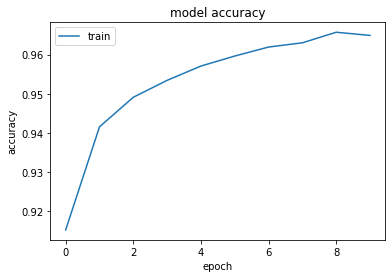

In [0]:
print(history2.history.keys())
plt.plot(history2.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
plt.plot(history2.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Models with  Dropout Technique

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=30)
model1.evaluate(X_test, y_test)

Epoch 1/30
232/232 [==============================] - 3s 13ms/step - loss: 0.1968 - accuracy: 0.9207
Epoch 2/30
232/232 [==============================] - 3s 13ms/step - loss: 0.1349 - accuracy: 0.9448
Epoch 3/30
232/232 [==============================] - 3s 13ms/step - loss: 0.1144 - accuracy: 0.9511
Epoch 4/30
232/232 [==============================] - 3s 13ms/step - loss: 0.0991 - accuracy: 0.9584
Epoch 5/30
232/232 [==============================] - 3s 13ms/step - loss: 0.0842 - accuracy: 0.9644
Epoch 6/30
232/232 [==============================] - 3s 13ms/step - loss: 0.0780 - accuracy: 0.9665
Epoch 7/30
232/232 [==============================] - 3s 12ms/step - loss: 0.0689 - accuracy: 0.9712
Epoch 8/30
232/232 [==============================] - 3s 13ms/step - loss: 0.0658 - accuracy: 0.9726
Epoch 9/30
232/232 [==============================] - 3s 13ms/step - loss: 0.0603 - accuracy: 0.9737
Epoch 10/30
232/232 [==============================] - 3s 12ms/step - loss: 0.0584 - accura

[0.16869908571243286, 0.9605371356010437]

dict_keys(['loss', 'accuracy'])


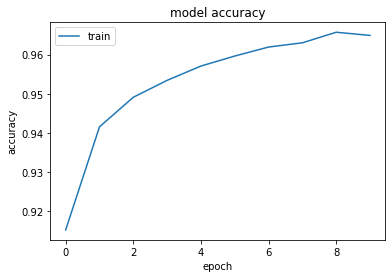

In [0]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Epoch 1/5
232/232 [==============================] - 3s 13ms/step - loss: 0.2070 - accuracy: 0.9179
Epoch 2/5
232/232 [==============================] - 3s 13ms/step - loss: 0.1391 - accuracy: 0.9446
Epoch 3/5
232/232 [==============================] - 3s 13ms/step - loss: 0.1196 - accuracy: 0.9540
Epoch 4/5
232/232 [==============================] - 3s 13ms/step - loss: 0.1037 - accuracy: 0.9581
Epoch 5/5
115/115 [==============================] - 0s 3ms/step - loss: 0.1811 - accuracy: 0.9479


[0.18112051486968994, 0.9479309320449829]

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 3s 413us/sample - loss: 0.5098 - acc: 0.7918
Epoch 2/5
7406/7406 [==============================] - 3s 374us/sample - loss: 0.2555 - acc: 0.9160
Epoch 3/5
7406/7406 [==============================] - 3s 366us/sample - loss: 0.2079 - acc: 0.9241
Epoch 4/5
7406/7406 [==============================] - 3s 371us/sample - loss: 0.1912 - acc: 0.9291
Epoch 5/5
3649/3649 [==============================] - 0s 134us/sample - loss: 0.1863 - acc: 0.9282


[0.18626050857296705, 0.9281995]

In [0]:
y_pred = model.predict(X_test)

Normalized confusion matrix
[[0.9  0.1 ]
 [0.02 0.98]]


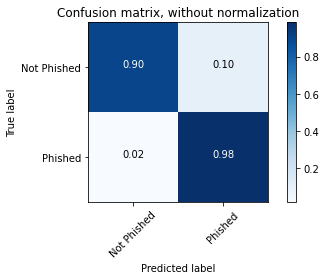

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred.round())
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Phished','Phished'],
                      title='Confusion matrix, without normalization')

In [0]:
#round(pred[7][0])

0.0

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=40)
model1.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 3s 365us/sample - loss: 0.5763 - acc: 0.8099
Epoch 2/5
7406/7406 [==============================] - 3s 343us/sample - loss: 0.2914 - acc: 0.9045
Epoch 3/5
7406/7406 [==============================] - 3s 345us/sample - loss: 0.2275 - acc: 0.9193
Epoch 4/5
7406/7406 [==============================] - 3s 345us/sample - loss: 0.1983 - acc: 0.9259
Epoch 5/5
3649/3649 [==============================] - 0s 116us/sample - loss: 0.1871 - acc: 0.9260


[0.1870557349425337, 0.92600715]

In [0]:
import numpy as np
l = np.array([[1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1]])
p= model.predict(l)

In [0]:
round(p[0][0])

0.0

In [0]:
round(pred[0][0])


0.0

In [0]:
y_test[0]

0

In [0]:
round(pred[9][0])

1.0

In [0]:
print(y_test[9])
pred = model.predict(X_test)

0


In [0]:
y_test[20]

0

In [0]:
round(pred[20][0])

0.0

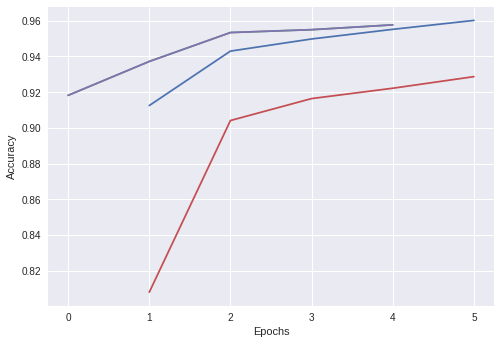

In [0]:
l=[0.9182,0.9372,0.9534,0.9550,0.9577]
l3=[0.8079,0.9041,0.9164,0.9222,0.9287]
l2=[0.9125,0.9430,0.9498,0.9552,0.9602]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(l1,l2,l)
plt.plot(l1,l3,l)

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 2s 279us/sample - loss: 0.2411 - acc: 0.9013
Epoch 2/5
7406/7406 [==============================] - 2s 256us/sample - loss: 0.1591 - acc: 0.9357
Epoch 3/5
7406/7406 [==============================] - 2s 259us/sample - loss: 0.1317 - acc: 0.9483
Epoch 4/5
7406/7406 [==============================] - 2s 255us/sample - loss: 0.1205 - acc: 0.9522
Epoch 5/5
3649/3649 [==============================] - 0s 85us/sample - loss: 0.1163 - acc: 0.9545


[0.11630499277393536, 0.95450807]

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40)
model.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 2s 217us/sample - loss: 0.5134 - acc: 0.8343
Epoch 2/5
7406/7406 [==============================] - 1s 193us/sample - loss: 0.2809 - acc: 0.9093
Epoch 3/5
7406/7406 [==============================] - 1s 193us/sample - loss: 0.2278 - acc: 0.9178
Epoch 4/5
7406/7406 [==============================] - 2s 206us/sample - loss: 0.2028 - acc: 0.9224
Epoch 5/5
3649/3649 [==============================] - 0s 86us/sample - loss: 0.1878 - acc: 0.9249


[0.18777581128103174, 0.92491096]

Text(0, 0.5, 'Train Accuracy')

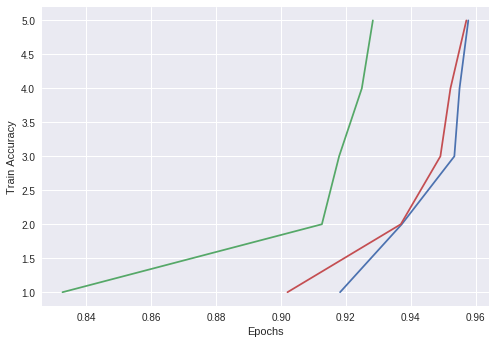

In [0]:
adam=[0.9182,0.9372,0.9534,0.9550,0.9577]
rms = [0.9020,0.9369,0.9491,0.9522,0.9571]
sgd = [0.8327,0.9126,0.9179,0.9249,0.9283]
l = [1,2,3,4,5]
plt.plot(adam,l)
plt.plot(sgd,l)
plt.plot(rms,l)
plt.xlabel("Epochs")
plt.ylabel("Train Accuracy")

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=40)
model1.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 5s 619us/sample - loss: 0.2107 - acc: 0.9132
Epoch 2/5
7406/7406 [==============================] - 5s 610us/sample - loss: 0.1383 - acc: 0.9415
Epoch 3/5
7406/7406 [==============================] - 4s 596us/sample - loss: 0.1177 - acc: 0.9544
Epoch 4/5
7406/7406 [==============================] - 4s 571us/sample - loss: 0.1001 - acc: 0.9606
Epoch 5/5
3649/3649 [==============================] - 1s 158us/sample - loss: 0.1247 - acc: 0.9540


[0.12468271436479589, 0.95396]

Text(0.5, 0, 'Train Accuracy')

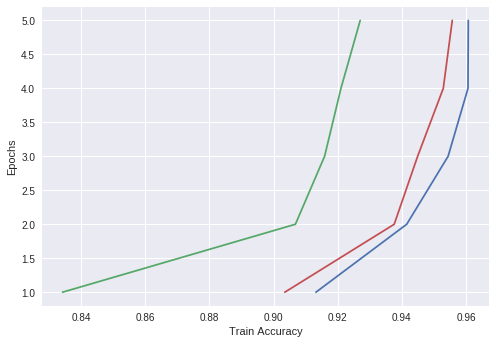

In [0]:
adam=[0.9132, 0.9415,0.9544,0.9606,0.9607]
rms = [0.9035,0.9376,0.9449,0.9529,0.9557]
sgd = [0.8342,0.9068,0.9159,0.9210,0.9270]
l = [1,2,3,4,5]
plt.plot(adam,l)
plt.plot(sgd,l)
plt.plot(rms,l)
plt.ylabel("Epochs")
plt.xlabel("Train Accuracy")

In [0]:
import numpy as np
def URLhavingattherate(URL): #4th column
    if '@' in URL:
        return 0
    else:
        return 1
def Redirectusingdoubleslash(URL):#5th column
    p=0
    for i in range(len(URL)-1):
        if URL[i]=="/" and URL[i+1]=="/":
            p=i
    if p>7:
        return 0
    else:
        return 1
def prefixsuffix(URL): #6th column
    if '-' in URL:
         return 0
    else:
        return 1
def Length(URL): #2nd column
    if len(URL)<54:
         return 1
    else:
        return 0.
def TinyURL(URL): #3rd column
    if 'bit.ly' in url:
         return 1
    else:
        return 0
def IP(URL):#1st Column
    if URL.count('x')>6:
        return 0
    else:
        return 1
def Dot(URL):#7th column
    if URL.count('.')>3:
        return 0
    else:
        return 1
def HTTPS(URL):#8th column
    if 'https' in URL:
        return 1
    else:
        return 0
def valid(e):
    if e<=1:
        return 1
    else:
        return 0
def favicon(f):
    if f==1:
        return 1
    else:
        return 0

def nonstandardport(port): #11
   if port == True:return 0 
   else: return 1

def requestUrl(URL): #13 column
    if URL>=22 and URL<=61:
        return 1
    else:
        return 0
def anchor(URL): #14column
    if URL>=31 and URL<=67:
        return 1
    else:
        return 0
def SFH(sfh): #16column
    if sfh=='':
        return 1
    else:
        return 0
def email(mail): #17column
    mail=0
    if mail==1:
        return 1
    else:
        return 0
def abnormal(URL): #18column
    hostname=''
    if URL==hostname:
        return 1
    else:
        return 0
def redirect(URL): #19column
    redirect=1
    if redirect>=2 and redirect<4:
        return 1
    else:
        return 0
def onmouseover(URL): #20colum
    if len(URL) >20:
        return 0
    else:
        return 1



    
def rightclick(URL): #21column
    if len(URL)>12:
        return 1
    else:
        return 0
def popup(txt): #22column
    if txt=="":
        return 0
    else:
        return 1


def iframe(frame): #23
    frame=0
    if frame==1:
        return 1
    else:
        return 0
def ageofdomain(month): #24
    #month = int(input('Enter the number to be converted: '))
    if month<6:
        return 1
    else:
        return 0
def dnsrecord(dns): #25
    if dns=='':
        return 1
    else:
        return 0
def websitetraffic(rank): #26
    if rank>=100000:
        return 1
    else:
        return 0
def pagerank(prank): #27
    if prank<0.2:
        return 1
    else :
        return 0
def googleindex(index): #28
    if index == True:
        return 1
    else:
        return 0

def numboflinks(link): #29
    if link>=0 and link<=2:
        return 1
    else:
        return 0

url = input()
exp = int(input())
L=[]
for i in range(30):
    L+=[0]
c9 = valid(exp)
L[8] = c9
c8 = Dot(url)
L[7] = c8
c7 = Dot(url)
L[6] = c7
c1 = IP(url)
L[0] = c1
c3 = TinyURL(url)
L[2]=c3
c2 = Length(url)
L[1] = c2
p = URLhavingattherate(url)
L[3]=p
k = Redirectusingdoubleslash(url)
L[4]=k
s = prefixsuffix(url)
L[5]=s
f = int(input())
c10 = favicon(f)
L[9] = c10
port = int(input('port'))
c11 = nonstandardport(port)
L[10]=c11
c12=requestUrl(url)
L[11]= c12
c13=anchor(url)
L[12]= c13
c14 = SFH(url)
L[13]= c14
mail = int(input('Mail'))
c15 = email(mail)
L[14] = c15
c16 = abnormal(url)
L[15] = c16
c17 = redirect(url)
L[16] = c17
c18 = onmouseover(url)
L[17] = c18
c19 = rightclick(url)
L[18] = c19
c20 = popup(url)
L[19] = c20
frame = int(input('frame'))
c21 = iframe(frame)
L[20] = c21
age = int(input('age'))
c22 = ageofdomain(age)
L[21] = c22
dns = int(input('dns'))
c23 = dnsrecord(dns)
L[22] = c23
rank = int(input('rank'))
c24 = websitetraffic(rank)
L[23] = c24
c25 = googleindex(rank)
L[24] = c25
links = int(input('Links'))
c26 = numboflinks(links)
L[25] = c26
for i in range(26,30):
    p = np.random.randn(1)
    if p>0.5:
        L[i] = 1
    else:
        L[i] = 0
print(*L)


KeyboardInterrupt: ignored

In [57]:
from sklearn.metrics import classification_report
y_pred = np.argmax(ypred,axis=1)
y_pred = y_pred.round()
print("Predicted labels")
print(y_pred)
print("Test labels")
print(y_test)
target_names = ['Not Phished - Class 0','Phished - Class 1']
print(classification_report(y_test ,y_pred , target_names = target_names ,zero_division=True))

Predicted labels
[0 0 0 ... 0 0 0]
Test labels
[0 0 0 ... 1 1 0]
                       precision    recall  f1-score   support

Not Phished - Class 0       0.43      1.00      0.60      1565
    Phished - Class 1       1.00      0.00      0.00      2084

             accuracy                           0.43      3649
            macro avg       0.71      0.50      0.30      3649
         weighted avg       0.76      0.43      0.26      3649

